
*   Probability
*   Oğuzhan Sarıgöl & Asrınalp Şahin
*   **Expected Goals xG**

In [ ]:
# Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


"We will analyze in our code the expected goal locations of football players based on which areas of the field, at what times, with which feet, using which parts of their bodies, and from which angles and distances they are most likely to score."

**Verinin Okunması ve Sütunların Karşılıkları**

1. **playerId**: Unique identifier for each player.
2. **id**: Unique identifier for each shot event.
3. **x_coordinates**: X coordinate of the shot on the field.
4. **y_coordinates**: Y coordinate of the shot on the field.
5. **goal**:Binary indicator whether the shot resulted in a goal (1 for yes, 0 for no).
6. **time**: Time of the shot event in the game.
7. **foot**: Indicator of which foot was used for the shot (1 for right foot, 0 for left foot).
8. **bodypart**: Indicator of which part of the body was used for the shot (1 for foot, 2 for head, 3 for other).
9. **preference**: Binary indicator whether the shot was taken with the player's preferred foot (1 for yes, 0 for no).
10. **angles**: Angle at which the shot was taken relative to the goal.
11. **distance**: Distance from which the shot was taken to the goal.
12. **xG**: Expected goals value, a measure of the likelihood that a shot results in a goal.


In [ ]:
file_path = '/allShots.csv'
all_shots_df = pd.read_csv("/content/allShots.csv")
print(all_shots_df.head())


   playerId         id  x_coordinates  y_coordinates  goal  time  foot  \
0     25413  177959212          92.40          27.88   1.0   2.0   1.0   
1     26150  177959247          89.25          35.36   0.0   3.0   0.0   
2     14763  177959280         100.80          35.36   1.0   4.0   1.0   
3      7868  177959289          85.05          22.44   0.0   7.0   1.0   
4      7868  177959429          78.75          20.40   0.0  14.0   1.0   

   bodypart  preferrence  angles  distance      xG  
0       1.0          1.0   26.77     14.01  0.1466  
1       2.0          1.0   25.99     15.81  0.1106  
2       3.0          1.0   78.79      4.41  0.4348  
3       2.0          0.0   15.74     23.06  0.0331  
4       1.0          1.0   12.59     29.56  0.0165  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=all_shots_df.copy()

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

**The following rows show the IDs and xG values of the top 5 players:**

In [ ]:

print(df.iloc[:5, [0, 10]])

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.describe().T

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df["xG"].fillna(0, inplace=True)

In [ ]:
df['x_coordinates'].fillna(df['x_coordinates'].median(), inplace=True)
df['y_coordinates'].fillna(df['y_coordinates'].median(), inplace=True)

In [ ]:
df.xG.unique()

In [ ]:
df["xG"].value_counts().count()

In [ ]:
df["xG"].value_counts()

In [ ]:
#Bar plot graph of the top 100 players with the highest total expected goals.
all_shots_df['xG_rounded'] = all_shots_df['xG']
player_xg_totals = all_shots_df.groupby('playerId')['xG_rounded'].sum()
top_100_players = player_xg_totals.nlargest(100)
fig, ax = plt.subplots(figsize=(20, 10))
top_100_players.plot.bar(ax=ax, width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', )
ax.set_xlabel('Player ID')
ax.set_ylabel('Total xG')
ax.set_title('Top 100 Players by Total xG')
plt.show()


**Below, we calculated the count, mean, median, maximum, minimum, and standard deviation of the xG values.**

In [ ]:
print("Count: ", str(all_shots_df["xG"].count()))
print("Mean: ", str(all_shots_df["xG"].mean()))
print("Median: ", str(all_shots_df["xG"].median()))
print("Maximum: ", str(all_shots_df["xG"].max()))
print("Minimum: ", str(all_shots_df["xG"].min()))
print("Standard Deviation: ", str(all_shots_df["xG"].std()))

**Displaying the top 10 most frequent xG values using a bar plot graph.**





In [ ]:
all_shots_df['xG_rounded'] = all_shots_df['xG'].round(3)
top_10_xg_values = all_shots_df['xG_rounded'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(10, 6))
top_10_xg_values.sort_index().plot.bar(ax=ax, width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
ax.set_xlabel('xG (Rounded to 3 Decimal Places)')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most Frequent xG Values')
plt.show()

**Density plot of xG values**

In [ ]:
sns.displot(df.xG, kind="kde", bw_adjust=1)


# xG Analysis Based on Shot Location
**Below is a visual representation of where players have the highest expected goals (xG) by shooting towards the goal. As the x_coordinates value increases, the shot gets closer to the goal. As seen, players have higher expected goals when they are closer to the goal.**

In [ ]:
sns.scatterplot(data=df, x='x_coordinates', y='y_coordinates', hue='xG', palette='coolwarm')
plt.title('Shot Locations by xG')
plt.xlabel('x_coordinates')
plt.ylabel('y_coordinates')
plt.show()

# Expected Goals Analysis with Angle and Distance Coloring

Below is a graph analyzing the expected goals (xG) based on the angles and distances from which players take shots. It is observed that players have a higher expected goal value when they shoot closer to the goal and at approximately a 90-degree angle from the goal's perspective.

## Graph: Angle, Distance, and Expected Goals (xG)

This graph examines the angles (`angles`) and distances (`distance`) from which players take shots and their expected goals (`xG`). The color coding represents different xG values.

In [ ]:
sns.scatterplot(data=df, x='angles', y='distance', hue='xG', palette='viridis')
plt.title('Angles vs Distance Colored by xG')
plt.xlabel('Angles')
plt.ylabel('Distance')
plt.show()


# Pair Plot Analysis: xG, Angles, and Distance

This pair plot includes scatter plots for each pair of features and histograms showing the marginal distributions of each feature.

* **xG and angles**: The scatter plot indicates a positive correlation between xG and angles. Generally, as angles increase, xG also tends to increase. xG appears higher for angles below 50. In the histograms, xG is concentrated between 0.0 and 0.2, while angles are concentrated between 0 and 50.

* **xG and distance**: In this plot, there is a negative relationship between xG and distance. As distance increases, xG generally decreases. xG can have higher values when distance is below 20. The distance histogram shows concentration between 0 and 20.

* **Angles and Distance**: There is a positive relationship between Angles and Distance. As distance increases, angles also tend to increase. However, this relationship is not as pronounced as between xG and angles. In the histograms, angles are mainly concentrated between 0 and 50, while distance is concentrated between 0 and 20.

In [ ]:
sns.pairplot(df[['xG', 'angles', 'distance']])
plt.suptitle('Pair Plot of xG, Angles, and Distance', y=1.02)
plt.show()


# Line Plot Analysis of xG and Distance

* As distance decreases, an increase in expected goals (xG) is observed.
* The highest density of expected goals is observed between 0 and 40 meters.

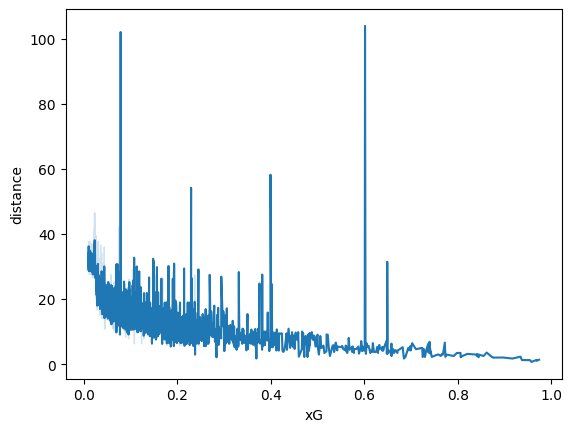

In [35]:
import matplotlib.pyplot as plt
sns.lineplot(x="xG", y="distance", data=df)
plt.show()

# Data Analysis Based on Preferred Foot When Shooting

This box plot visualizes the expected goals (xG) values based on which foot players prefer to use when shooting. The x-axis represents the feet used (0: Left, 1: Right), and the y-axis shows the xG values.

A box plot displays the distribution, median, and outliers of xG values for each foot. The boxes represent the middle 50% of the xG values (interquartile range) and the median. The upper and lower lines of the boxes indicate the spread of the data and potential outliers.

**Distribution of xG Based on Foot Used:**

- When using the right foot (1), the xG values show a wider distribution compared to the left foot (0). This indicates a greater diversity in expected goal values for shots taken with the right foot.
- When using the left foot (0), xG values show a narrower distribution, suggesting less variability in expected goal values for shots taken with the left foot.
- Median values may be similar for both feet, but shots taken with the right foot have a wider range of outlier values.

In [ ]:
sns.boxplot(data=df, x='preferrence', y='xG')
plt.title('xG by Foot Used')
plt.xlabel('Foot (0: Left, 1: Right)')
plt.ylabel('xG')
plt.show()


# Expected Goals Analysis Based on Match Minute

This graph shows how expected goals (xG) values change over time during a match. The x-axis represents time (minutes in the match), and the y-axis shows xG values.

A line plot illustrates the trend of xG values over time. This graph allows us to observe how xG values increase or decrease during specific time intervals. In essence, this graph helps us examine the trends of xG values over time and assess performance in specific time periods.

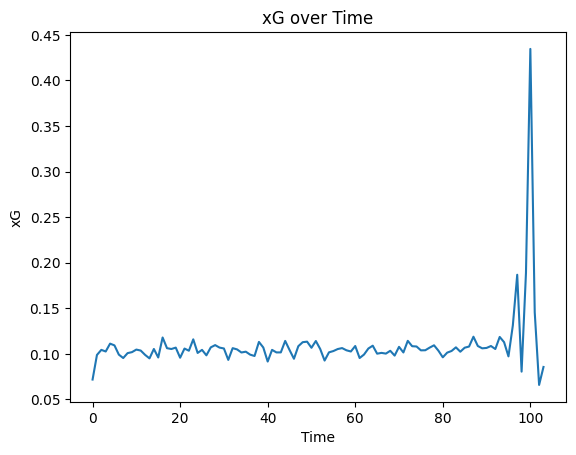

In [37]:
sns.lineplot(data=df, x='time', y='xG', errorbar=None)
plt.title('xG over Time')
plt.xlabel('Time')
plt.ylabel('xG')
plt.show()

# xG Analysis Based on Body Part Used
1.0 - Foot, 2.0 - Head, 3.0 - Other body parts.

This graph is used to compare expected goals (xG) values across different body parts used. The x-axis represents the body parts used, and the y-axis shows xG values.

A violin plot displays the distribution and density of xG values for each body part. This allows us to see which body parts have higher or lower xG values and understand which body parts exhibit a wider range of xG values. This graph is highly useful for analyzing how effective players are using different body parts and determining which body part is more efficient.

In the code below, we calculated how many shots were taken with each body part in our dataset.

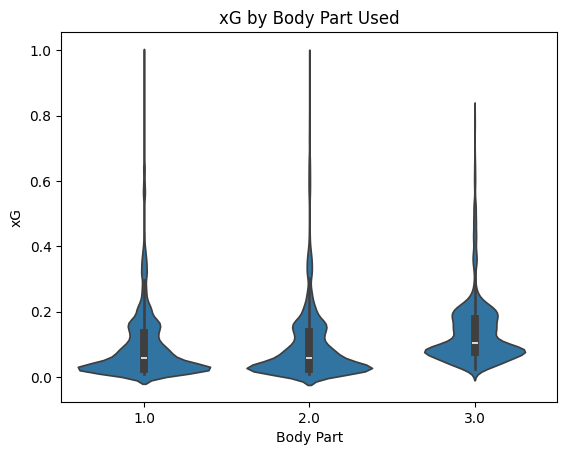

In [38]:

sns.violinplot(data=df, x='bodypart', y='xG')
plt.title('xG by Body Part Used')
plt.xlabel('Body Part')
plt.ylabel('xG')
plt.show()


In [39]:
df=all_shots_df.copy()

In [40]:
#Hangi bodypart ile ne kadar şut çekildiğini anlamamıza yarayan kod.
if 'bodypart' in df.columns and not df['bodypart'].isnull().all():
    bodypart_counts = df['bodypart'].value_counts().reset_index()
    bodypart_counts.columns = ['bodypart', 'count']
    print("\nCount of shots by each body part:")
    print(bodypart_counts)
    if not bodypart_counts.empty:
        most_frequent_bodypart = bodypart_counts.iloc[0]
        print(f"\nThe most frequently used body part for shots is: {most_frequent_bodypart['bodypart']} with {most_frequent_bodypart['count']} shots")
    else:
        print("\nNo data available for body parts.")
else:
    print("\nThe 'bodypart' column is missing or contains no valid data.")


Count of shots by each body part:
   bodypart  count
0       1.0  21961
1       2.0  14130
2       3.0   6987

The most frequently used body part for shots is: 1.0 with 21961.0 shots


# Correlation Heatmap for Understanding Relationships Between Columns

This correlation heatmap visualizes the relationships between various columns in the 'allShots.csv' file. Correlation coefficients indicate the strength and direction of a linear relationship between two variables, ranging from -1 to 1, where:

1: Perfect positive correlation (as one variable increases, the other also increases)
0: No correlation (no linear relationship between variables)
-1: Perfect negative correlation (as one variable increases, the other decreases)
Colors in the heatmap represent these correlation coefficients:

Dark red: Strong positive correlation
Dark blue: Strong negative correlation
White/gray shades: Weak or no correlation
Let's examine some relationships based on examples:

xG (Expected Goals) with Other Variables:

There is a high positive correlation between xG and angles (
𝑟
=
0.88
). This indicates that as angles increase, the expected goal probability also increases.
There is a strong negative correlation between xG and distance (
𝑟
=
−
0.69
). This shows that as distance increases, the expected goal probability decreases.
There is a moderate positive correlation between xG and x_coordinates (
𝑟
=
0.60
). This indicates that as x_coordinates increase, the expected goal probability also increases.
x_coordinates with Other Variables:

There is a very strong negative correlation between x_coordinates and distance (
𝑟
=
−
0.95
). This indicates that as x_coordinates increase, distance decreases.
Goal (Gol) with Other Variables:

There is a positive correlation between goal and angles (
𝑟
=
0.33
). This suggests that as angles increase, the probability of scoring a goal also increases.
This correlation heatmap allows you to quickly visualize relationships between variables in your dataset and understand which variables are strongly correlated with each other. Such analysis can be crucial, especially for modeling or prediction tasks.

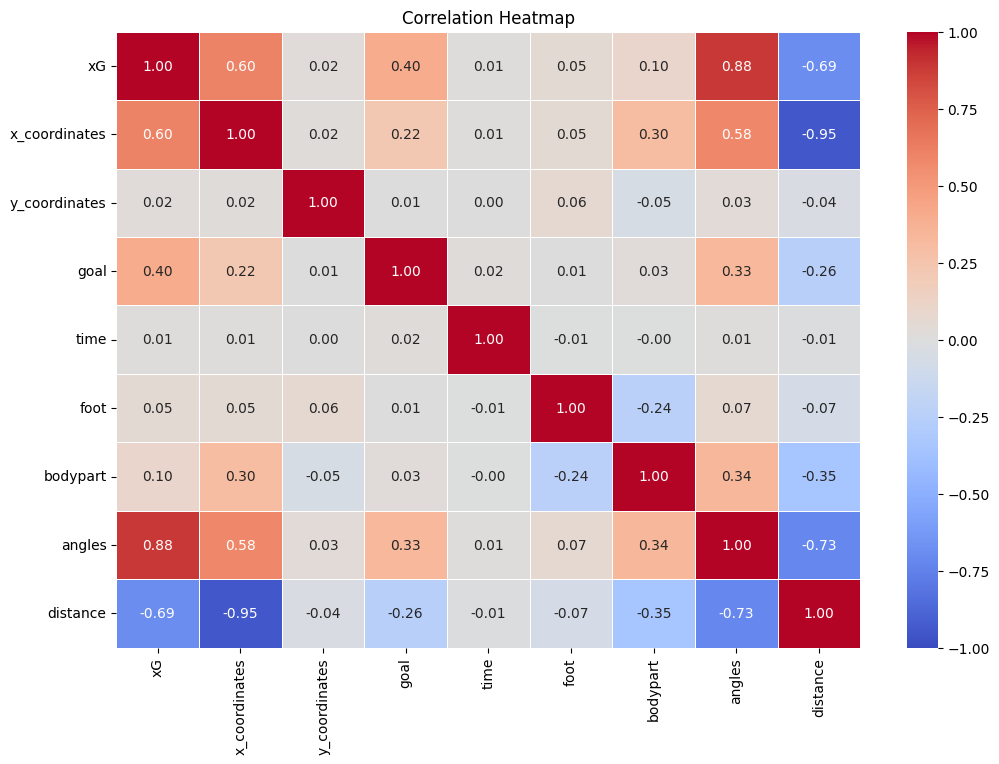

In [41]:

columns_of_interest = ['xG', 'x_coordinates', 'y_coordinates', 'goal', 'time', 'foot', 'bodypart', 'angles', 'distance']
data_subset = df[columns_of_interest]
corr_matrix = data_subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Identifying Outliers Using the IQR Method

The analysis utilizes the Interquartile Range (IQR) method to measure how far 'xG' values deviate from the 1st quartile (Q1) and 3rd quartile (Q3) values. If a value is less than Q1 minus 1.5 times IQR or greater than Q3 plus 1.5 times IQR, it is considered an outlier. Outliers represent unusual values in the dataset. This analysis determines the total number of outliers and presents this count in a table format.

A box plot has been created to visualize outliers. The box plot clearly displays the distribution of 'xG' values and highlights outliers. Within the plot, the line inside the box represents the median, while the edges of the box represent the first and third quartile (Q1 and Q3) of the data. Points outside the box indicate outliers, which are values that lie significantly beyond the majority of the data.

Number of outliers: 2161


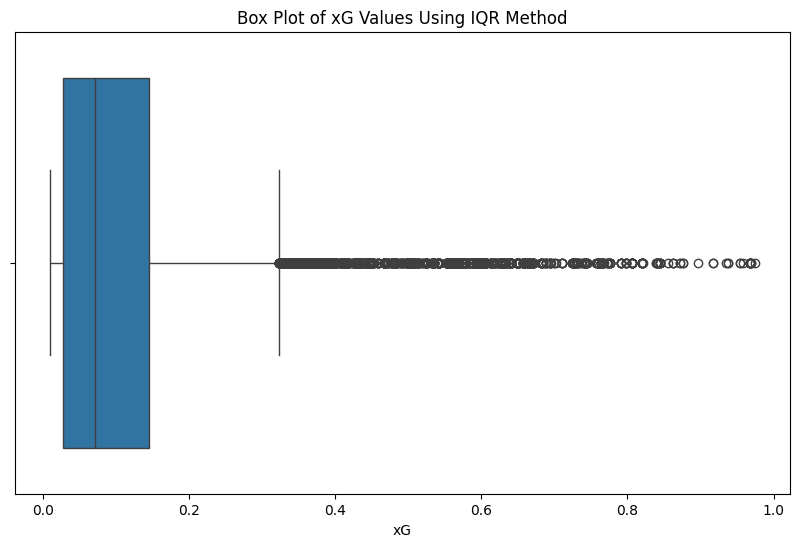

In [42]:
# Select the xG column
xG = df['xG']

# Determine outliers using the IQR method
Q1 = xG.quantile(0.25)
Q3 = xG.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(xG < lower_bound) | (xG > upper_bound)]

# Print the number of outliers
print(f"Number of outliers: {outliers.shape[0]}")

# Create a box plot of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=xG)
plt.title('Box Plot of xG Values Using IQR Method')
plt.xlabel('xG')
plt.show()


# Identifying Outliers Using the Z-score Method

The Z-score method used in the analysis measures how far 'xG' values deviate from the mean and standard deviation. If a value is more than 3 standard deviations away from the mean (Z-score > 3 or Z-score < -3), it is considered an outlier. Outliers represent unusual values in the dataset. This analysis determines the total number of outliers and presents this count in a table format. A box plot has been created to visualize outliers. The box plot clearly displays the distribution of 'xG' values and highlights outliers. Within the plot, the line inside the box represents the median, while the edges of the box represent the first and third quartile (Q1 and Q3) of the data. Points outside the box indicate outliers, which are values that lie significantly beyond the majority of the data.

Number of outliers: 970


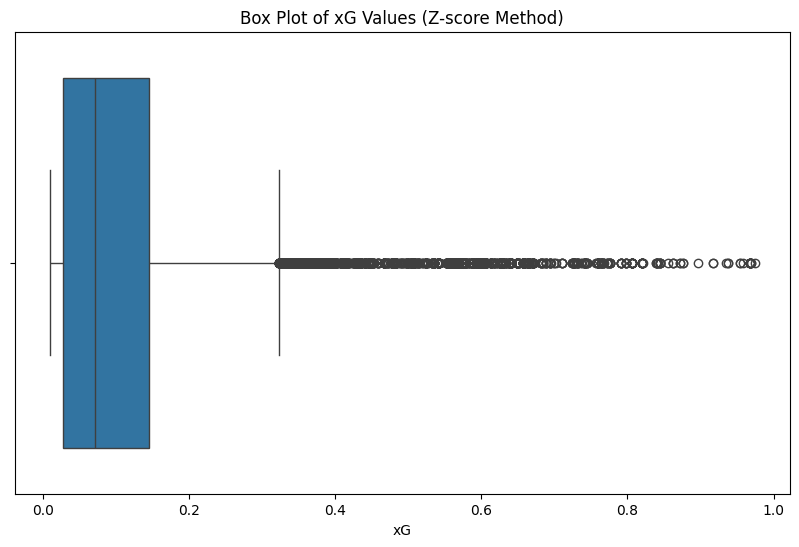

In [43]:

# Select the xG column
xG = df['xG']

# Calculate mean and standard deviation using Z-score method
mean_xG = np.mean(xG)
std_xG = np.std(xG)

# Calculate Z-scores
z_scores = (xG - mean_xG) / std_xG

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = df[(z_scores > 3) | (z_scores < -3)]

# Print the number of outliers
print(f"Number of outliers: {outliers.shape[0]}")

# Create a box plot of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=xG)
plt.title('Box Plot of xG Values (Z-score Method)')
plt.xlabel('xG')
plt.show()


In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")
